# Project_1: Customer Service Requests Analysis

<b>Proejct Descrription:-</b> You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

In [22]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1:Understand the dataset

In [23]:
#Load dataset from file "311_Service_Requests_from_2010_to_Present.csv"
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [24]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


<b>1.1:Identify the shape of the dataset

In [25]:
#Identify the shape of the dataset
dataset.shape

(364558, 53)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

<b>1.2:Identify variables with null values.

In [27]:
#Identify variables with null values
dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

# <b>2. Perform basic data exploratory analysis

<b>2.1:Utilize missing value treatment

In [28]:
#Imputation Method (Zero)
df_zero_imputed = dataset.fillna(0)

In [29]:
df_zero_imputed.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Intersection Street 1             0
Intersection Street 2             0
Address Type                      0
City                              0
Landmark                          0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name          

<b>2.2:Analyze the date column and remove the entries if it has an incorrect timelineUtilize

In [30]:
#creat dataset for only date columns
data_date=dataset[["Created Date","Closed Date","Due Date"]]
data_date

,Created Date,Closed Date,Due Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 07:59:45 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 07:59:44 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 07:59:29 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:57:46 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 07:56:58 AM
...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 08:04:44 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 08:04:28 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 08:01:30 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 08:01:29 AM


In [31]:
data_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Created Date  364558 non-null  object
 1   Closed Date   362177 non-null  object
 2   Due Date      364555 non-null  object
dtypes: object(3)
memory usage: 8.3+ MB


In [32]:
data_date['Created Date']=pd.to_datetime(data_date['Created Date'])
data_date['Closed Date']=pd.to_datetime(data_date['Closed Date'])
data_date['Due Date']=pd.to_datetime(data_date['Due Date'])
data_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Created Date  364558 non-null  datetime64[ns]
 1   Closed Date   362177 non-null  datetime64[ns]
 2   Due Date      364555 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 8.3 MB


In [33]:
data_date.head()

,Created Date,Closed Date,Due Date
0,2015-12-31 23:59:45,2016-01-01 00:55:15,2016-01-01 07:59:45
1,2015-12-31 23:59:44,2016-01-01 01:26:57,2016-01-01 07:59:44
2,2015-12-31 23:59:29,2016-01-01 04:51:03,2016-01-01 07:59:29
3,2015-12-31 23:57:46,2016-01-01 07:43:13,2016-01-01 07:57:46
4,2015-12-31 23:56:58,2016-01-01 03:24:42,2016-01-01 07:56:58


<b>2.3:Draw a frequency plot for city-wise complaints

In [34]:
dataset.groupby(["City"]).size()

City
ARVERNE                   259
ASTORIA                  7991
Astoria                   906
BAYSIDE                  1550
BELLEROSE                 487
BREEZY POINT               31
BRONX                   49171
BROOKLYN               118862
CAMBRIA HEIGHTS           617
CENTRAL PARK              110
COLLEGE POINT            1544
CORONA                   5383
EAST ELMHURST            3558
ELMHURST                 3438
East Elmhurst              30
FAR ROCKAWAY             1397
FLORAL PARK               196
FLUSHING                 7487
FOREST HILLS             2122
FRESH MEADOWS            2453
GLEN OAKS                 361
HOLLIS                   1231
HOWARD BEACH             1144
Howard Beach                1
JACKSON HEIGHTS          2106
JAMAICA                  8932
KEW GARDENS              1008
LITTLE NECK               712
LONG ISLAND CITY         3028
Long Island City          170
MASPETH                  3118
MIDDLE VILLAGE           2291
NEW HYDE PARK             129
NEW Y

In [35]:
#Calculate Frequcy for complaints in city
data_city=dataset.groupby(['City']).size().reset_index()
data_city=data_city.rename(columns={0:'count'})

In [36]:
data_city

,City,count
0,ARVERNE,259
1,ASTORIA,7991
2,Astoria,906
3,BAYSIDE,1550
4,BELLEROSE,487
5,BREEZY POINT,31
6,BRONX,49171
7,BROOKLYN,118862
8,CAMBRIA HEIGHTS,617
9,CENTRAL PARK,110


<AxesSubplot:title={'center':'Complaints concentration across Brooklyn'}, xlabel='City'>

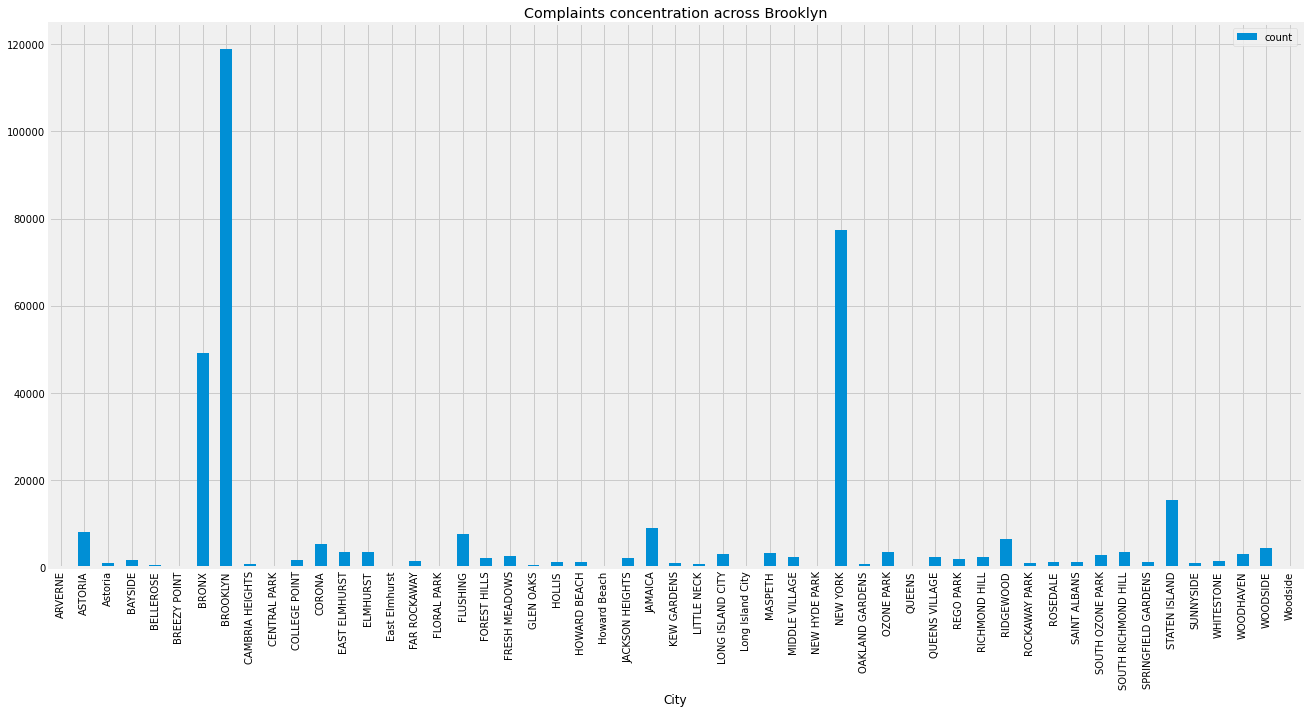

In [37]:
data_city.plot(x="City",y="count",kind="bar",figsize=(20,10),title = 'Complaints concentration across Brooklyn')

<b>2.4:Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [40]:
df_Brooklyn = dataset[dataset['Borough']=='BROOKLYN']

In [41]:
df_Brooklyn.shape

(118864, 53)

(-74.05061403028367, -73.84647934348564, 40.563150823850876, 40.74729501421672)

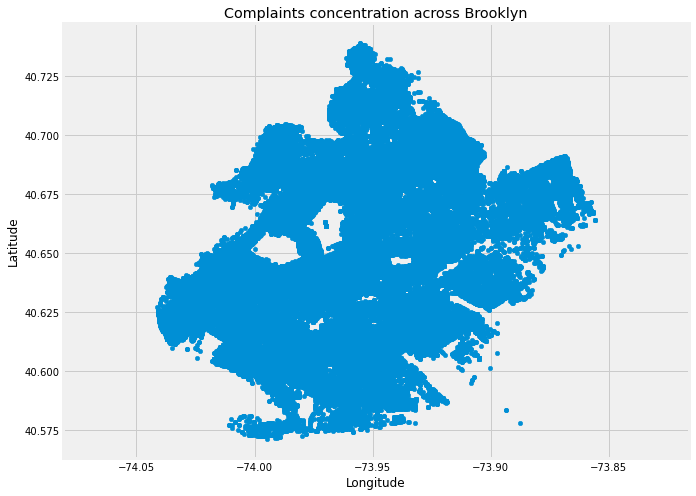

In [42]:
df_Brooklyn[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.563150823850876, 40.74729501421672)

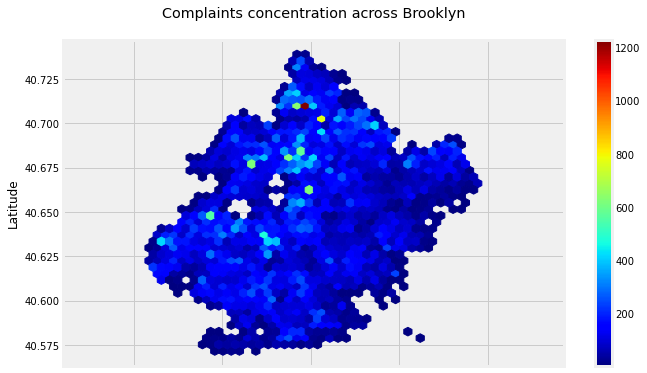

In [43]:
df_Brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

# 3. Find major types of complaints:

<b>3.1: Plot a bar graph of count vs. complaint types

<AxesSubplot:title={'center':'Most common Complaints'}>

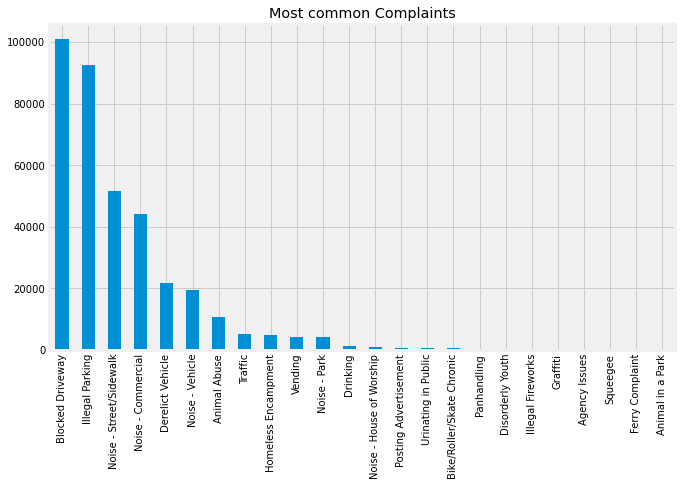

In [45]:
(dataset['Complaint Type'].value_counts()).head(24).plot(kind='bar',
                    figsize=(10,6), title = 'Most common Complaints')

<b>3.2:Find the top 10 types of complaints

<AxesSubplot:title={'center':'Top 10 Complaints'}>

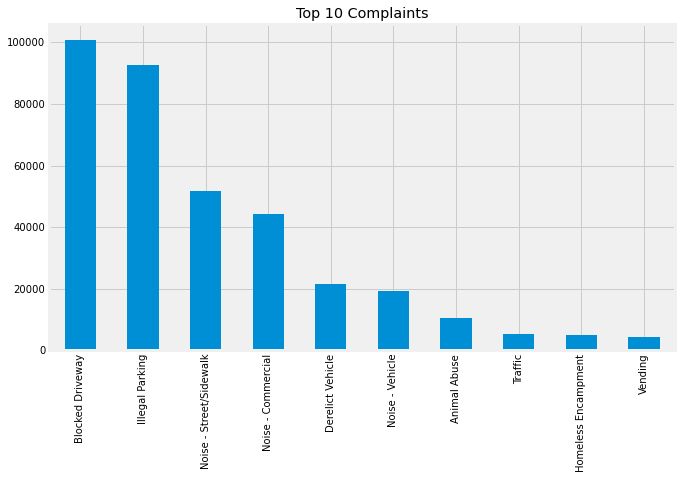

In [49]:
(dataset['Complaint Type'].value_counts()).head(10).plot(kind='bar',
                    figsize=(10,6), title = 'Top 10 Complaints')

<b>3.3Display the types of complaints in each city in a separate dataset

In [53]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [54]:
dataset['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [55]:
dataset['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [52]:
complaintTypecity = pd.DataFrame({'count':dataset.groupby(['Complaint Type','City']).size()}).reset_index()
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
772,Vending,STATEN ISLAND,25
773,Vending,SUNNYSIDE,15
774,Vending,WHITESTONE,1
775,Vending,WOODHAVEN,6


In [57]:
dataset.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      166
                                    In Car                        41
                                    Neglected                    951
                                    No Shelter                   165
                                    Other (complaint details)    412
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 13
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 290, dtype: int64

# 4.Visualize the major types of complaints in each city

In [59]:
complaintTypecity = pd.DataFrame({'count':dataset.groupby(['City','Complaint Type']).size()}).reset_index()
complaintTypecity

,City,Complaint Type,count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
772,Woodside,Blocked Driveway,27
773,Woodside,Derelict Vehicle,8
774,Woodside,Illegal Parking,124
775,Woodside,Noise - Commercial,2


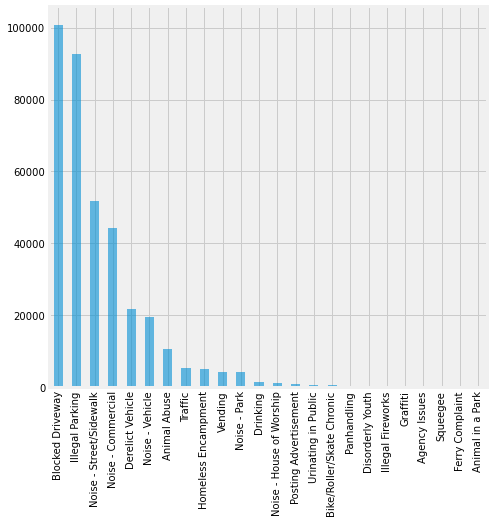

In [58]:
dataset['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

# 5. Check if the average response time across various types of complaints

In [76]:
data_date

,Created Date,Closed Date,Due Date
0,2015-12-31 23:59:45,2016-01-01 00:55:15,2016-01-01 07:59:45
1,2015-12-31 23:59:44,2016-01-01 01:26:57,2016-01-01 07:59:44
2,2015-12-31 23:59:29,2016-01-01 04:51:03,2016-01-01 07:59:29
3,2015-12-31 23:57:46,2016-01-01 07:43:13,2016-01-01 07:57:46
4,2015-12-31 23:56:58,2016-01-01 03:24:42,2016-01-01 07:56:58
...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,2015-01-01 08:04:44
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,2015-01-01 08:04:28
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,2015-01-01 08:01:30
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,2015-01-01 08:01:29


In [77]:
data_date['Request_Closing_Time'] =data_date['Closed Date'] -data_date['Created Date']

data_date['Request_Closing_Time'].head()

0   0 days 00:55:30
1   0 days 01:27:13
2   0 days 04:51:34
3   0 days 07:45:27
4   0 days 03:27:44
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [78]:
data_date

,Created Date,Closed Date,Due Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,2016-01-01 07:59:45,0 days 00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,2016-01-01 07:59:44,0 days 01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,2016-01-01 07:59:29,0 days 04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,2016-01-01 07:57:46,0 days 07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,2016-01-01 07:56:58,0 days 03:27:44
...,...,...,...,...
364553,2015-01-01 00:04:44,2015-01-01 10:22:31,2015-01-01 08:04:44,0 days 10:17:47
364554,2015-01-01 00:04:28,2015-01-01 02:25:02,2015-01-01 08:04:28,0 days 02:20:34
364555,2015-01-01 00:01:30,2015-01-01 00:20:33,2015-01-01 08:01:30,0 days 00:19:03
364556,2015-01-01 00:01:29,2015-01-01 02:42:22,2015-01-01 08:01:29,0 days 02:40:53


In [81]:
Request_Closing_Time = data_date['Request_Closing_Time']
Request_Closing_Time.describe()

count                       362177
mean     0 days 04:11:53.299632500
std      0 days 05:51:42.547519569
min                0 days 00:01:01
25%                0 days 01:15:33
50%                0 days 02:40:16
75%                0 days 05:14:38
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

4 hr 11min is average response time across various types of complaints